In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
train = pd.read_csv("kaggle_titanic_train.csv")
test = pd.read_csv("kaggle_titanic_test.csv")

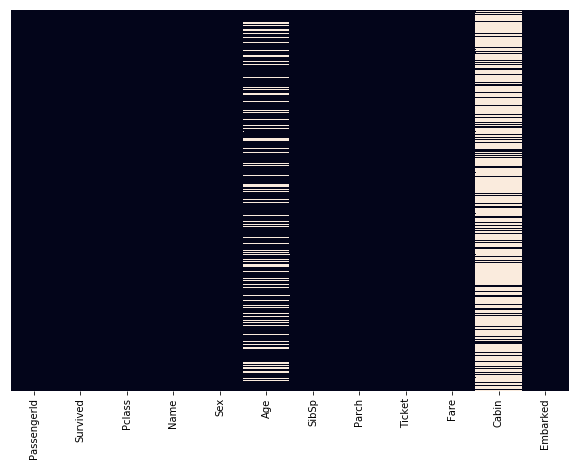

In [81]:
plt.figure(figsize=(10,7))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

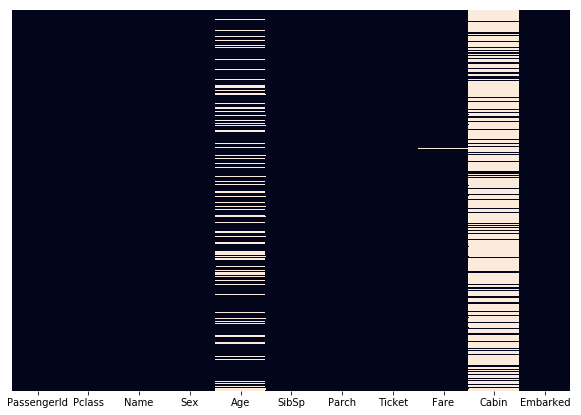

In [82]:
plt.figure(figsize=(10,7))
sns.heatmap(test.isnull(), yticklabels=False, cbar=False)

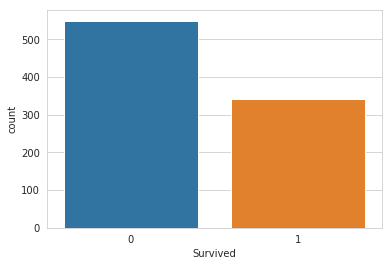

In [83]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train)

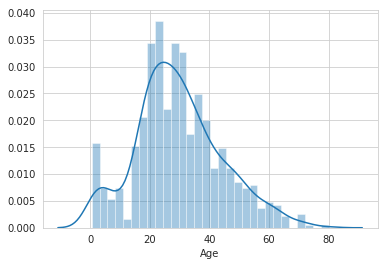

In [84]:
sns.distplot(train['Age'].dropna(), bins=30)

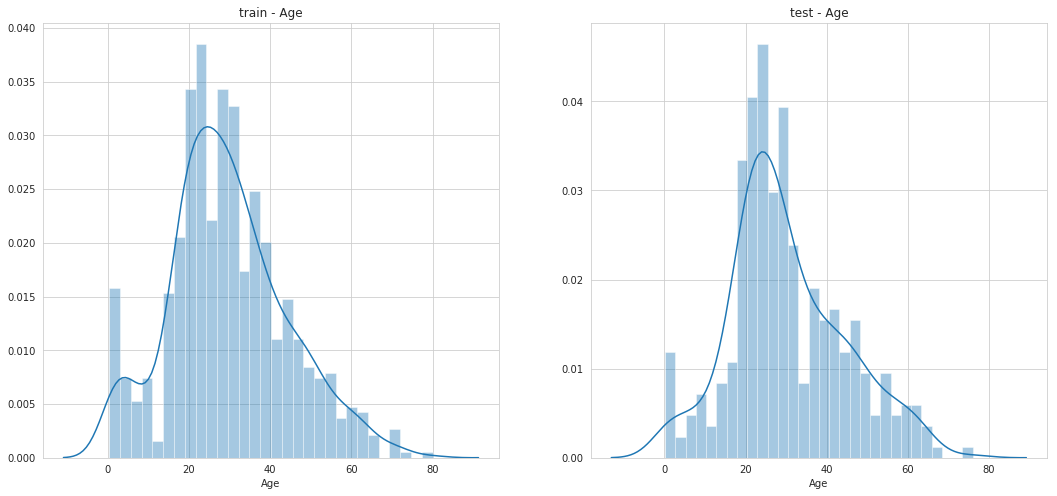

In [85]:
f,ax=plt.subplots(1,2,figsize=(18,8))

# 첫번째 그래프
sns.distplot(train['Age'].dropna(), bins=30,ax=ax[0])
ax[0].set_title('train - Age')

# 두번째 그래프 
sns.distplot(test['Age'].dropna(), bins=30,ax=ax[1])
ax[1].set_title('test - Age')
plt.show()

## 나이 결측치 처리

In [0]:
train['Age'] = train['Age'].fillna(train['Age'].mean())
test['Age'] = test['Age'].fillna(test['Age'].mean())

In [87]:
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


## Embarked 결측치 처리

In [88]:
val_Embarked = train['Embarked'].value_counts()
val_Embarked

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [0]:
train['Embarked'] = train['Embarked'].fillna('S')

In [90]:
print(train.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


## Fare 결측치 처리

In [0]:
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

In [92]:
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [93]:
train.shape


(891, 12)

In [94]:
test.shape

(418, 11)

In [95]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [96]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [0]:
train['Sex'] = train['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
test['Sex'] = test['Sex'].map( {'female': 0, 'male': 1} ).astype(int)    

train['Embarked'] = train['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
test['Embarked']= test['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [0]:
train['Age'] = train['Age'].astype('int')
test['Age'] = test['Age'].astype('int')

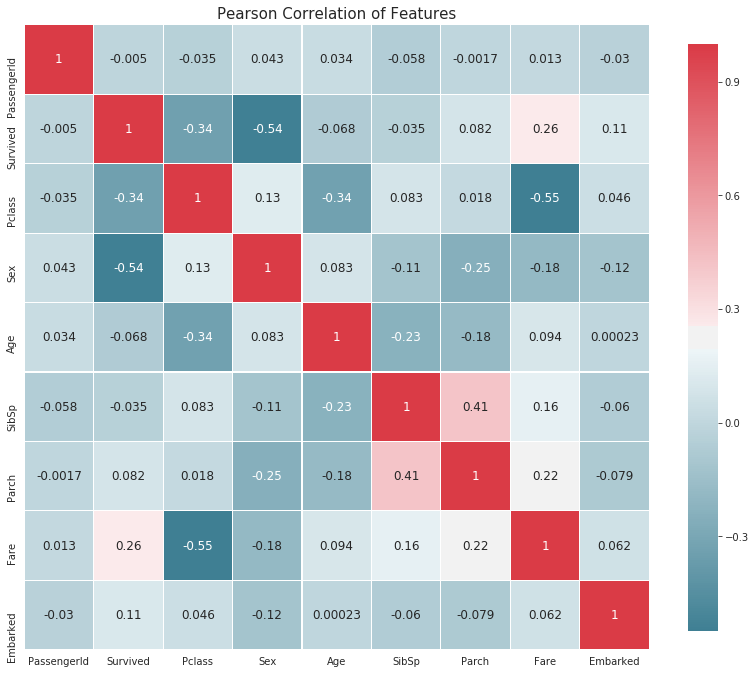

In [116]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(train)

In [117]:
train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.544332,0.523008,0.381594,32.204208,0.361392
std,257.353842,0.486592,0.836071,0.477990,13.013778,1.102743,0.806057,49.693429,0.635673
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,1.000000,29.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [0]:
sel = ['PassengerId', 'Sex', 'Pclass', 'Fare','Embarked']

X_train = train[sel]
y_train = train['Survived']
X_test = test[sel]

In [0]:
model = RandomForestClassifier(random_state=0)

In [129]:
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [130]:
predictions = model.predict(X_test)
predictions[:15]

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1])

In [0]:
sub = pd.read_csv('kaggle_titanic_gender_submission.csv')

In [132]:
sub.head(15)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [133]:
sub['Survived'] = predictions
sub.head(15)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [0]:
sub.to_csv('randomforest_cor_model.csv', index=False)